<a href="https://colab.research.google.com/github/brainmentorspvtltd/MSIT_FDP_DeepLearning/blob/main/ANNUsingTensorflowMSIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
# tensorflow -> keras (another library for deep learning)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
# mnist - handwritten digits from 0 to 9
(x_train, y_train),(x_test, y_test) =  tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
import matplotlib.pyplot as plt

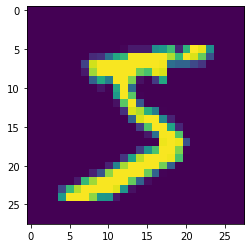

In [6]:
plt.imshow(x_train[0])

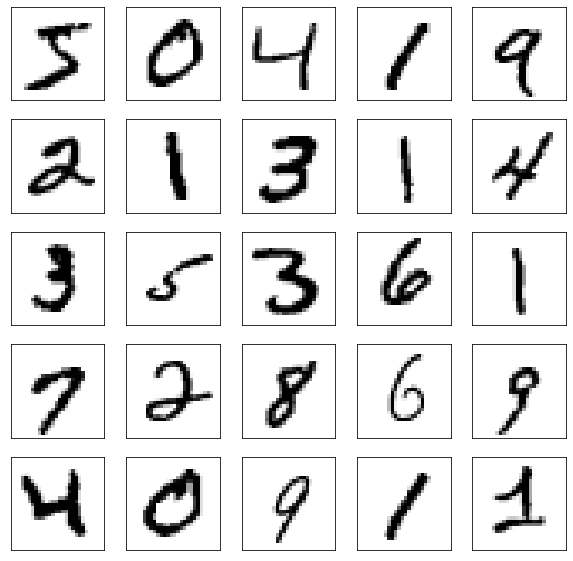

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary)

In [9]:
# Data Preprocessing
# Normalization on Images
x_train, x_test = x_train / 255.0, x_test / 255.0

In [10]:
model = Sequential([
    # Input Layer
    # Flatten is used to convert 2D to 1D
    # so in input layer we will have 784 neurons
    Flatten(input_shape=(28,28)),
    # Hidden Layer(s)...
    Dense(512, activation="sigmoid"),
    Dense(256, activation="sigmoid"),
    # Output Layer
    Dense(10, activation="softmax")
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [13]:
# sgd - stochastic gradient descent
# SparseCategoricalCrossentropy - Loss Function when we have multi-classification problem
model.compile(optimizer = 'sgd',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [14]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 13s 7ms/step - loss: 2.1103 - accuracy: 0.3997 - val_loss: 1.7930 - val_accuracy: 0.5586
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 1.3544 - accuracy: 0.7046 - val_loss: 0.9791 - val_accuracy: 0.7821
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.8101 - accuracy: 0.8066 - val_loss: 0.6633 - val_accuracy: 0.8403
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6013 - accuracy: 0.8475 - val_loss: 0.5272 - val_accuracy: 0.8624
Epoch 5/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.5020 - accuracy: 0.8669 - val_loss: 0.4535 - val_accuracy: 0.8801


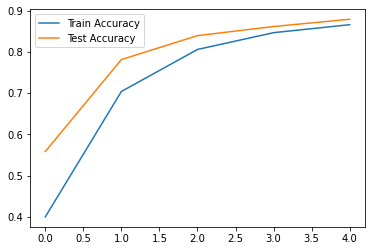

In [15]:
plt.plot(model.history.history['accuracy'], label="Train Accuracy")
plt.plot(model.history.history['val_accuracy'], label="Test Accuracy")
plt.legend()
plt.show()

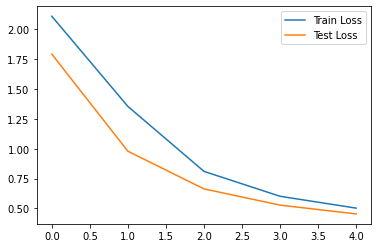

In [16]:
plt.plot(model.history.history['loss'], label="Train Loss")
plt.plot(model.history.history['val_loss'], label="Test Loss")
plt.legend()
plt.show()